# 3.4 Dataset Preprocessing Demo (ISL_CLSRT)

This notebook demonstrates basic preprocessing of the ISL_CLSRT metadata file (`isl_train_meta.csv`) and links metadata entries with sample videos from Chapter 3. It includes:
- Data inspection
- Cleaning (missing values, duplicates)
- Signer statistics
- Mapping glosses to sample videos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the ISL_CLSRT metadata
df = pd.read_csv('/content/drive/MyDrive/IETGenAI-SLT/Chapter 4/isl_train_meta.csv')
df.head()

,Sentences,File location,gloss_sequence,signer_id,sample_id
0,it does not make any difference to me,ISL_CSLRT_Corpus\Videos_Sentence_Level\it does...,IT MAKE ANY DIFFERENCE ME DO NOT,6,ISL_0278_S6
1,tell me truth,ISL_CSLRT_Corpus\Videos_Sentence_Level\tell me...,TELL TRUTH,6,ISL_0341_S6
2,do me a favour,ISL_CSLRT_Corpus\Videos_Sentence_Level\do me a...,DO FAVOUR ME,4,ISL_0046_S4
3,do not worry,ISL_CSLRT_Corpus\Videos_Sentence_Level\do not ...,DONOT WORRY,4,ISL_0065_S4
4,do not abuse him,ISL_CSLRT_Corpus\Videos_Sentence_Level\do not ...,HIM ABUSE DONOT,5,ISL_0048_S5


In [4]:
# Check for null values and duplicates
print("Shape:", df.shape)
print("Missing values:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())


Shape: (500, 5)
Missing values:
Sentences         0
File location     0
gloss_sequence    0
signer_id         0
sample_id         0
dtype: int64

Duplicate rows: 0


In [5]:
# Drop duplicates if any
df = df.drop_duplicates()
df = df.dropna(subset=['Sentences', 'gloss_sequence'])


Signer counts:
 signer_id
0    98
3    74
4    72
5    70
6    65
1    65
2    56
Name: count, dtype: int64


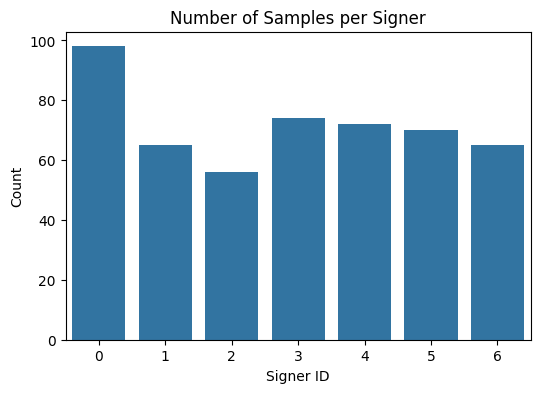

In [6]:
# Check signer distribution
signer_counts = df['signer_id'].value_counts()
print("Signer counts:\n", signer_counts)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='signer_id', data=df)
plt.title('Number of Samples per Signer')
plt.xlabel('Signer ID')
plt.ylabel('Count')
plt.show()


## Mapping Metadata to Sample Videos

We will manually match 3 example video filenames to their corresponding metadata rows.


In [7]:
sample_sentences = [
    "are you free today",
    "bring water for me",
    "could you please talk slower"
]

matched_rows = df[df['Sentences'].str.lower().isin([s.lower() for s in sample_sentences])]
matched_rows[['Sentences', 'gloss_sequence', 'signer_id', 'File location']]


,Sentences,gloss_sequence,signer_id,File location
11,are you free today,YOU FREE TODAY,2,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
98,bring water for me,BRING WATER ME,3,ISL_CSLRT_Corpus\Videos_Sentence_Level\bring w...
103,could you please talk slower,YOU PLEASE TALK SLOWER,1,ISL_CSLRT_Corpus\Videos_Sentence_Level\could y...
189,bring water for me,BRING WATER ME,4,ISL_CSLRT_Corpus\Videos_Sentence_Level\bring w...
208,could you please talk slower,YOU PLEASE TALK SLOWER,3,ISL_CSLRT_Corpus\Videos_Sentence_Level\could y...
213,bring water for me,BRING WATER ME,0,ISL_CSLRT_Corpus\Videos_Sentence_Level\bring w...
218,are you free today,YOU FREE TODAY,5,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
263,bring water for me,BRING WATER ME,1,ISL_CSLRT_Corpus\Videos_Sentence_Level\bring w...
295,are you free today,YOU FREE TODAY,5,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
327,are you free today,YOU FREE TODAY,0,ISL_CSLRT_Corpus\Videos_Sentence_Level\are you...
